# Rugby Data Experiment

In [28]:
# To make markdown from this file
# jupyter nbconvert --to markdown RugbyExperiment.ipynb --output README.md

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams["patch.force_edgecolor"] = True

pd.options.mode.chained_assignment = None  # default='warn'

In [30]:
rugby = pd.read_csv("RugbyData.csv")
rugby.head(5)

,Team1,Score1,Score2,Team2,Year
0,Ireland,24,28,New Zealand,2023
1,England,30,24,Fiji,2023
2,France,28,29,South Africa,2023
3,Wales,17,29,Argentina,2023
4,France,27,13,New Zealand,2023


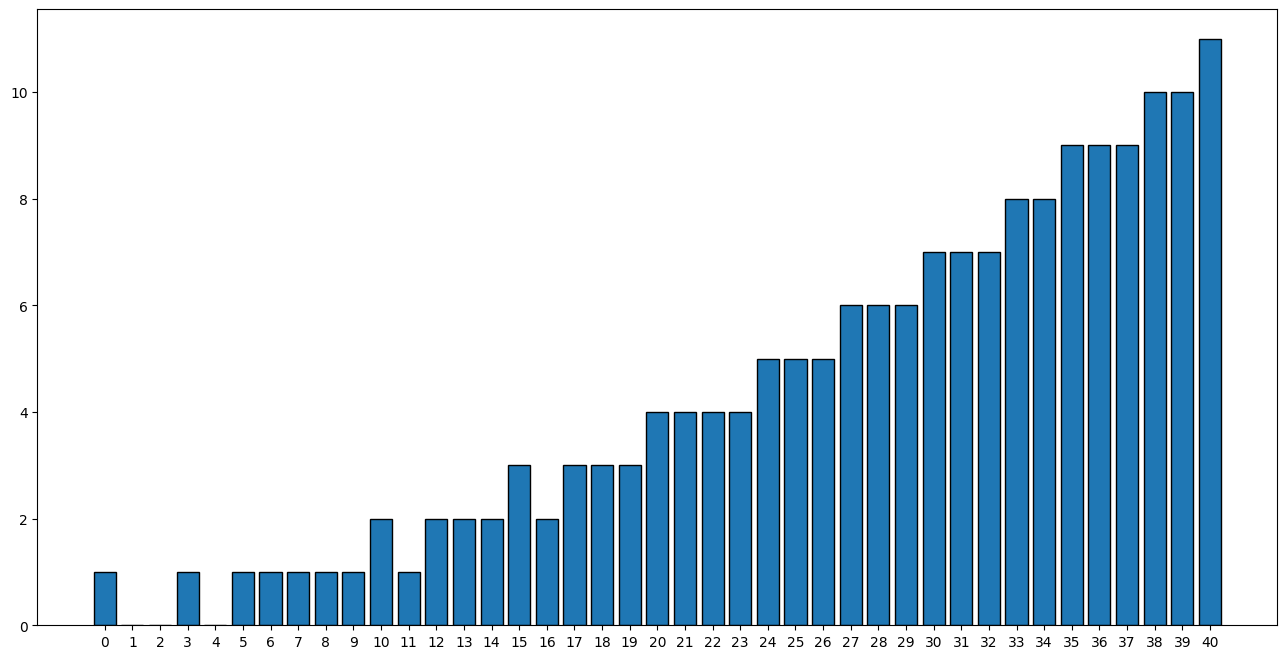

In [31]:
# Number of ways to reach score n.
n = 40

# table[i] will store count of solutions for value i.
table = [0 for i in range(n+1)]

# Base case (If given value is 0)
table[0] = 1

# One by one consider given 3 moves and update the 
# table[] values after the index greater than or equal 
# to the value of the picked move.
for i in range(3, n+1):
    table[i] += table[i-3]
for i in range(5, n+1):
    table[i] += table[i-5]
for i in range(7, n+1):
    table[i] += table[i-7]


d={i:x for i,x in enumerate(table)}
score_possibilities = plt.figure(figsize=(16,8))
plt.bar(range(len(d)), list(d.values()), align='center')
plt.xticks(range(len(d)), list(d.keys()))
plt.show()

## All_Scores is a series made by appending Score1 and Score2 columns

In [32]:
All_Scores = rugby['Score1'].append(rugby['Score2'])

C:\Users\benmc\AppData\Local\Temp\ipykernel_21752\3103183966.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  All_Scores = rugby['Score1'].append(rugby['Score2'])


## Countplot for scores

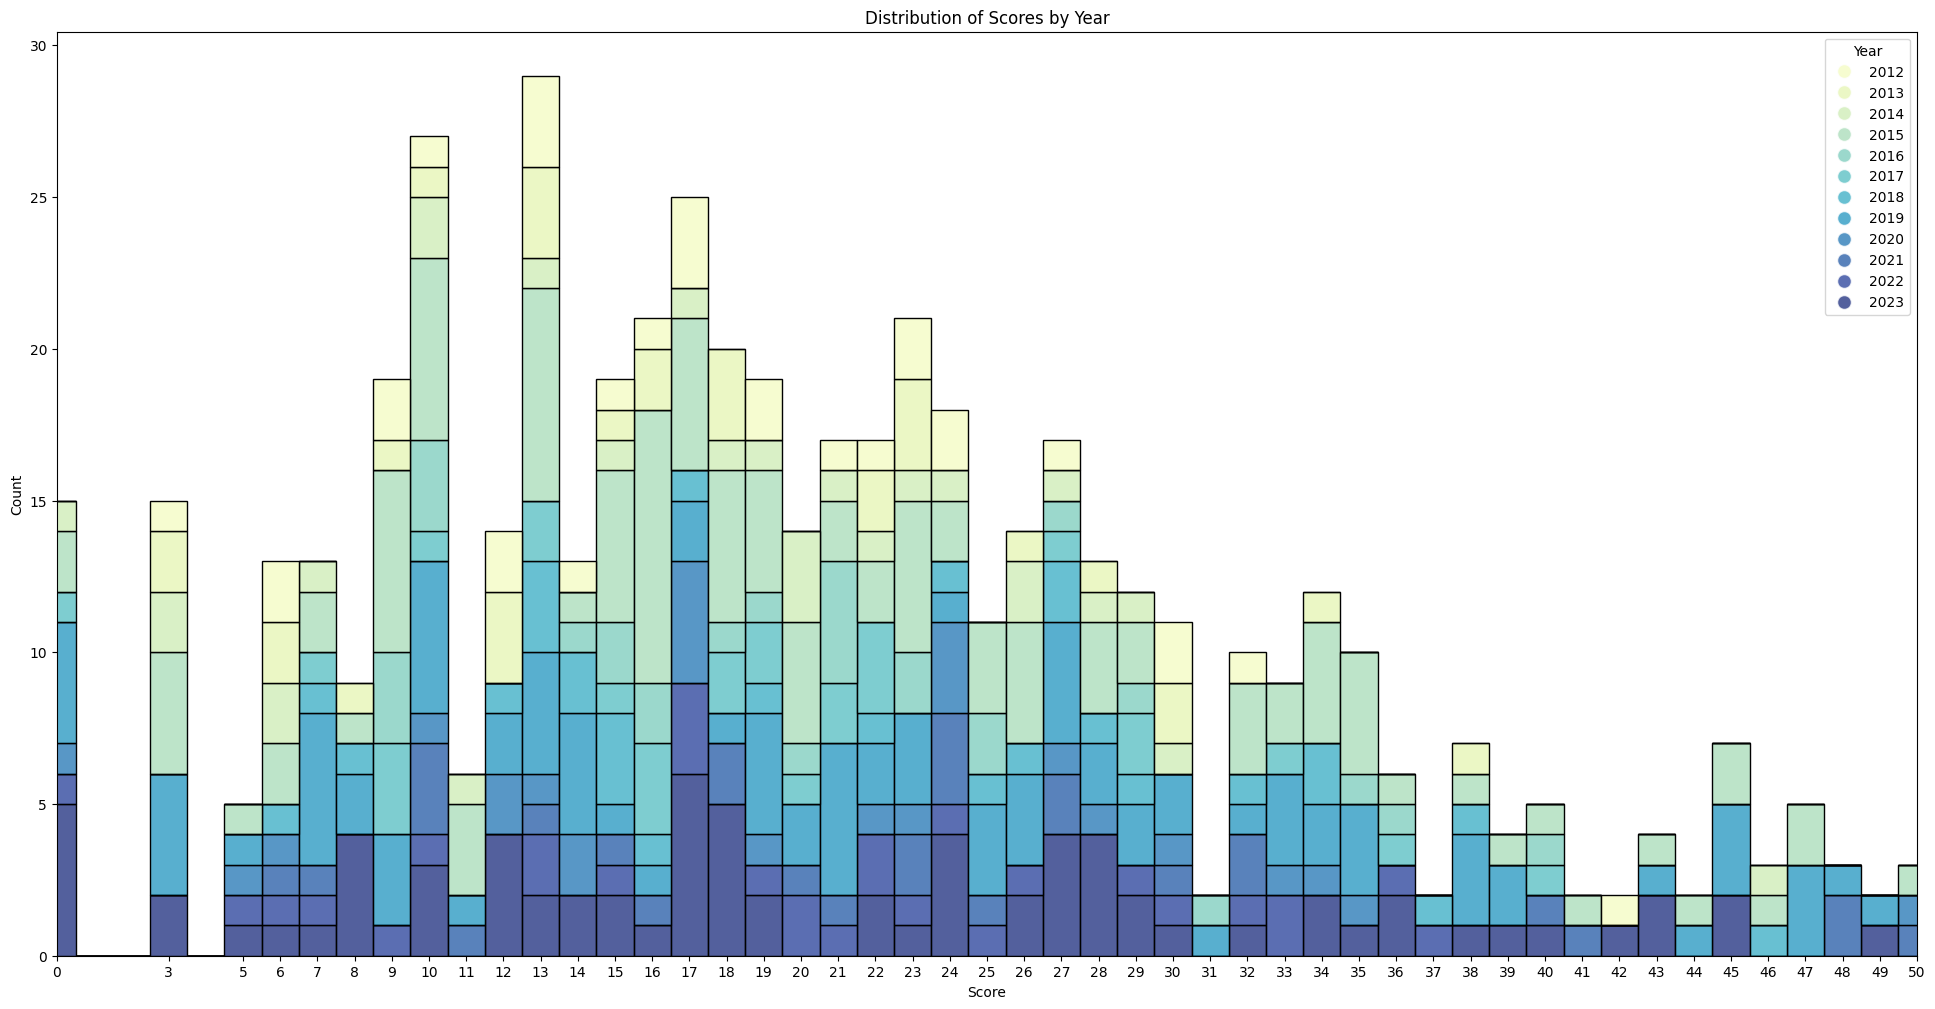

In [43]:
# Convert the data to a DataFrame
rugby = pd.read_csv("RugbyData.csv")

df = rugby.melt(id_vars=['Year'], value_vars=['Score1', 'Score2'], value_name='Score')
df.drop(columns=['variable'], inplace=True)
df = df.sort_values(by='Year')

# Creating a custom color palette
year_palette = sns.color_palette("YlGnBu", n_colors=df["Year"].nunique())

# Creating a distplot using seaborn
plt.figure(figsize=(24, 12))
hist = sns.histplot(data=df, bins=np.arange(70)-0.5, x="Score", hue="Year", multiple="stack", palette=year_palette)

# Getting the color information from the distplot legend
legend_colors = [patch.get_facecolor() for patch in hist.legend_.legendHandles]

# Creating a custom legend
legend_labels = df["Year"].unique()
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=label,
                  markerfacecolor=color, markersize=10)
                  for label, color in zip(legend_labels, legend_colors)]

plt.legend(handles=legend_handles, title="Year")
# Adding axis ticks for each score value
plt.xticks(df["Score"].unique())
plt.title("Distribution of Scores by Year")
plt.xlabel("Score")
plt.xlim(0,50)
plt.ylabel("Count")
plt.show()



C:\Users\benmc\AppData\Local\Temp\ipykernel_21752\2603930824.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(All_Scores, bins=np.arange(70)-0.5, kde=False, color = 'g')


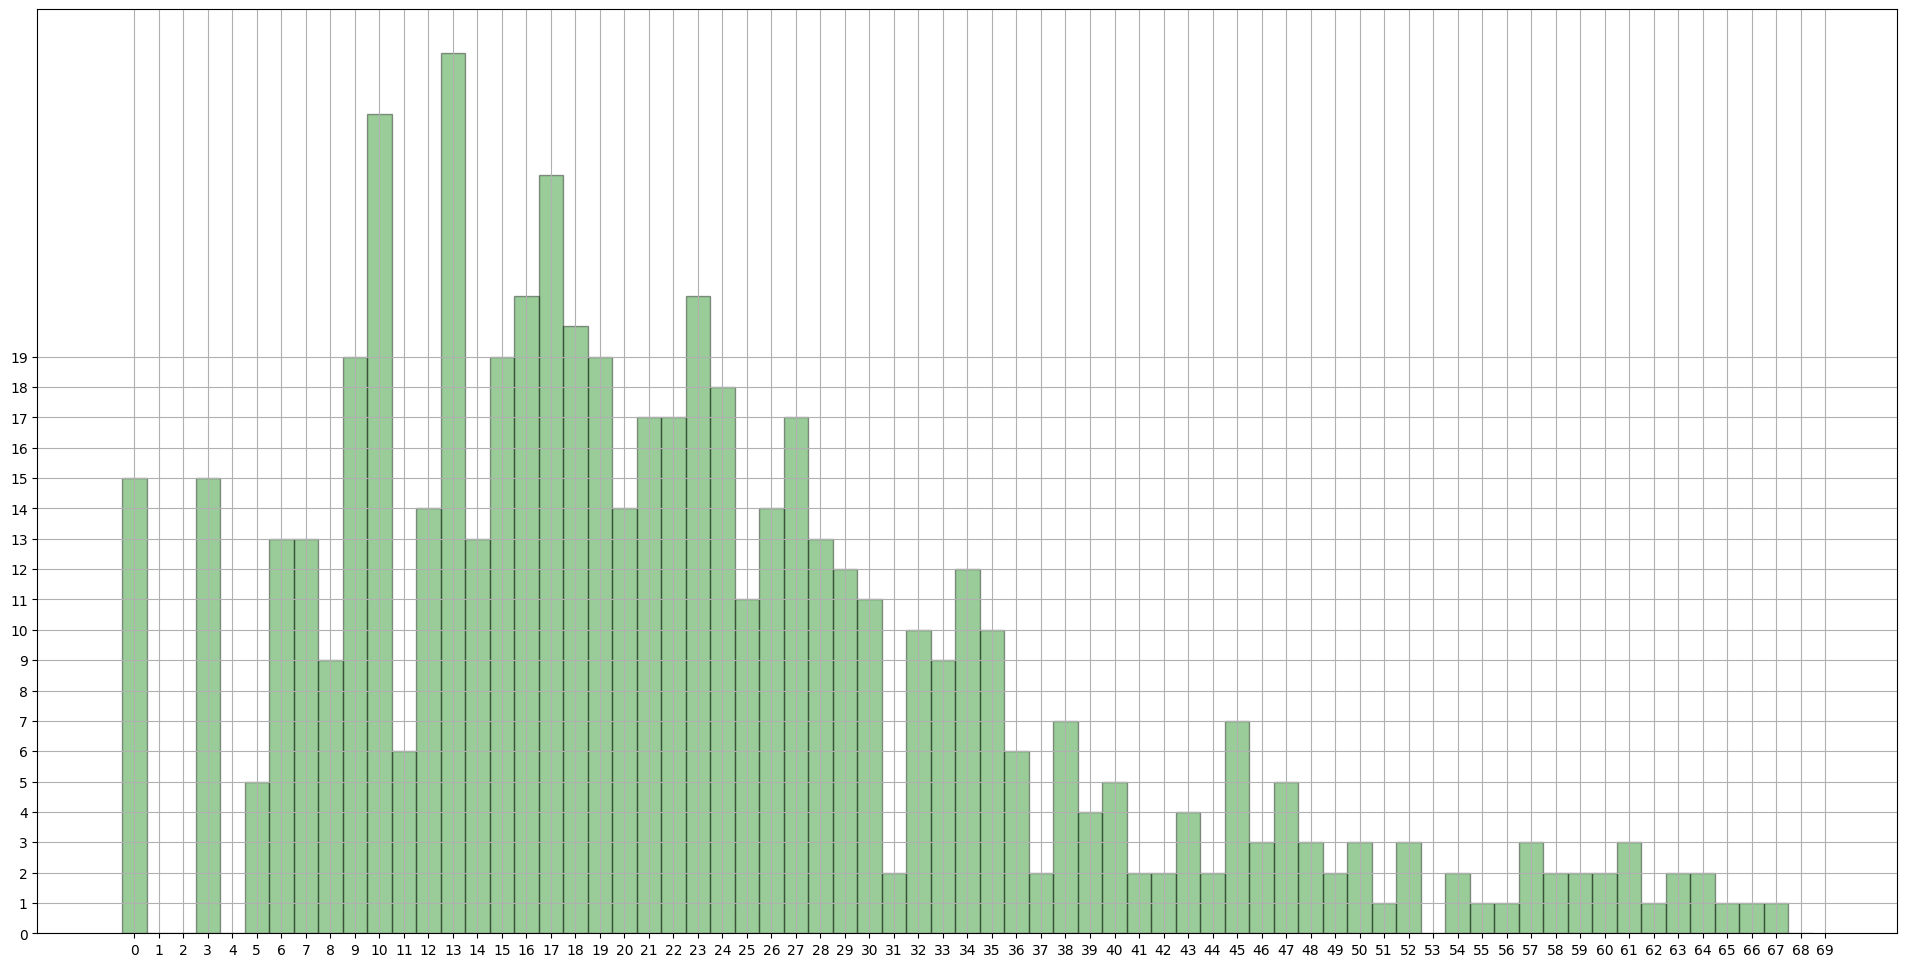

In [34]:

score_data_countplot = plt.figure(figsize=(24,12))
ax = sns.distplot(All_Scores, bins=np.arange(70)-0.5, kde=False, color = 'g')
ax.set(xticks=range(0,70))
ax.set(yticks=range(0,20))
ax.grid()

In [40]:
most_freq = All_Scores.value_counts()
for score, count in most_freq.head(15).iteritems():
    print("{} has occurred {} times".format(score, count))

13 has occurred 29 times
10 has occurred 27 times
17 has occurred 25 times
16 has occurred 21 times
23 has occurred 21 times
18 has occurred 20 times
15 has occurred 19 times
9 has occurred 19 times
19 has occurred 19 times
24 has occurred 18 times
21 has occurred 17 times
22 has occurred 17 times
27 has occurred 17 times
3 has occurred 15 times
0 has occurred 15 times


C:\Users\benmc\AppData\Local\Temp\ipykernel_21752\449208587.py:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for score, count in most_freq.head(15).iteritems():


#### Common scores seen in the ranges 9-10, 12-13, 15-23, 26-30

## Team Specifics

## Function to return match history of 2 teams

In [36]:
def match_history(country1, country2):
    games1 = rugby[(rugby['Team1']==country1) & (rugby['Team2']==country2)]
    games2 = rugby[(rugby['Team2']==country1) & (rugby['Team1']==country2)]
    c = games2.columns
    games2[[c[0], c[3]]] = games2[[c[3], c[0]]]
    games2[[c[1], c[2]]] = games2[[c[2], c[1]]]
    games = games1.append(games2)
    games.sort_index(inplace=True)
    return games

In [37]:
mh = match_history("France", "New Zealand")
mh

C:\Users\benmc\AppData\Local\Temp\ipykernel_21752\246494248.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  games = games1.append(games2)


,Team1,Score1,Score2,Team2,Year
4,France,27,13,New Zealand,2023


In [38]:
print("Mean scores are {} {}".format(mh['Score1'].mean(), mh['Score2'].mean()))

Mean scores are 27.0 13.0


#### Here we will create a regression plot of the scores from a pair of teams' match history

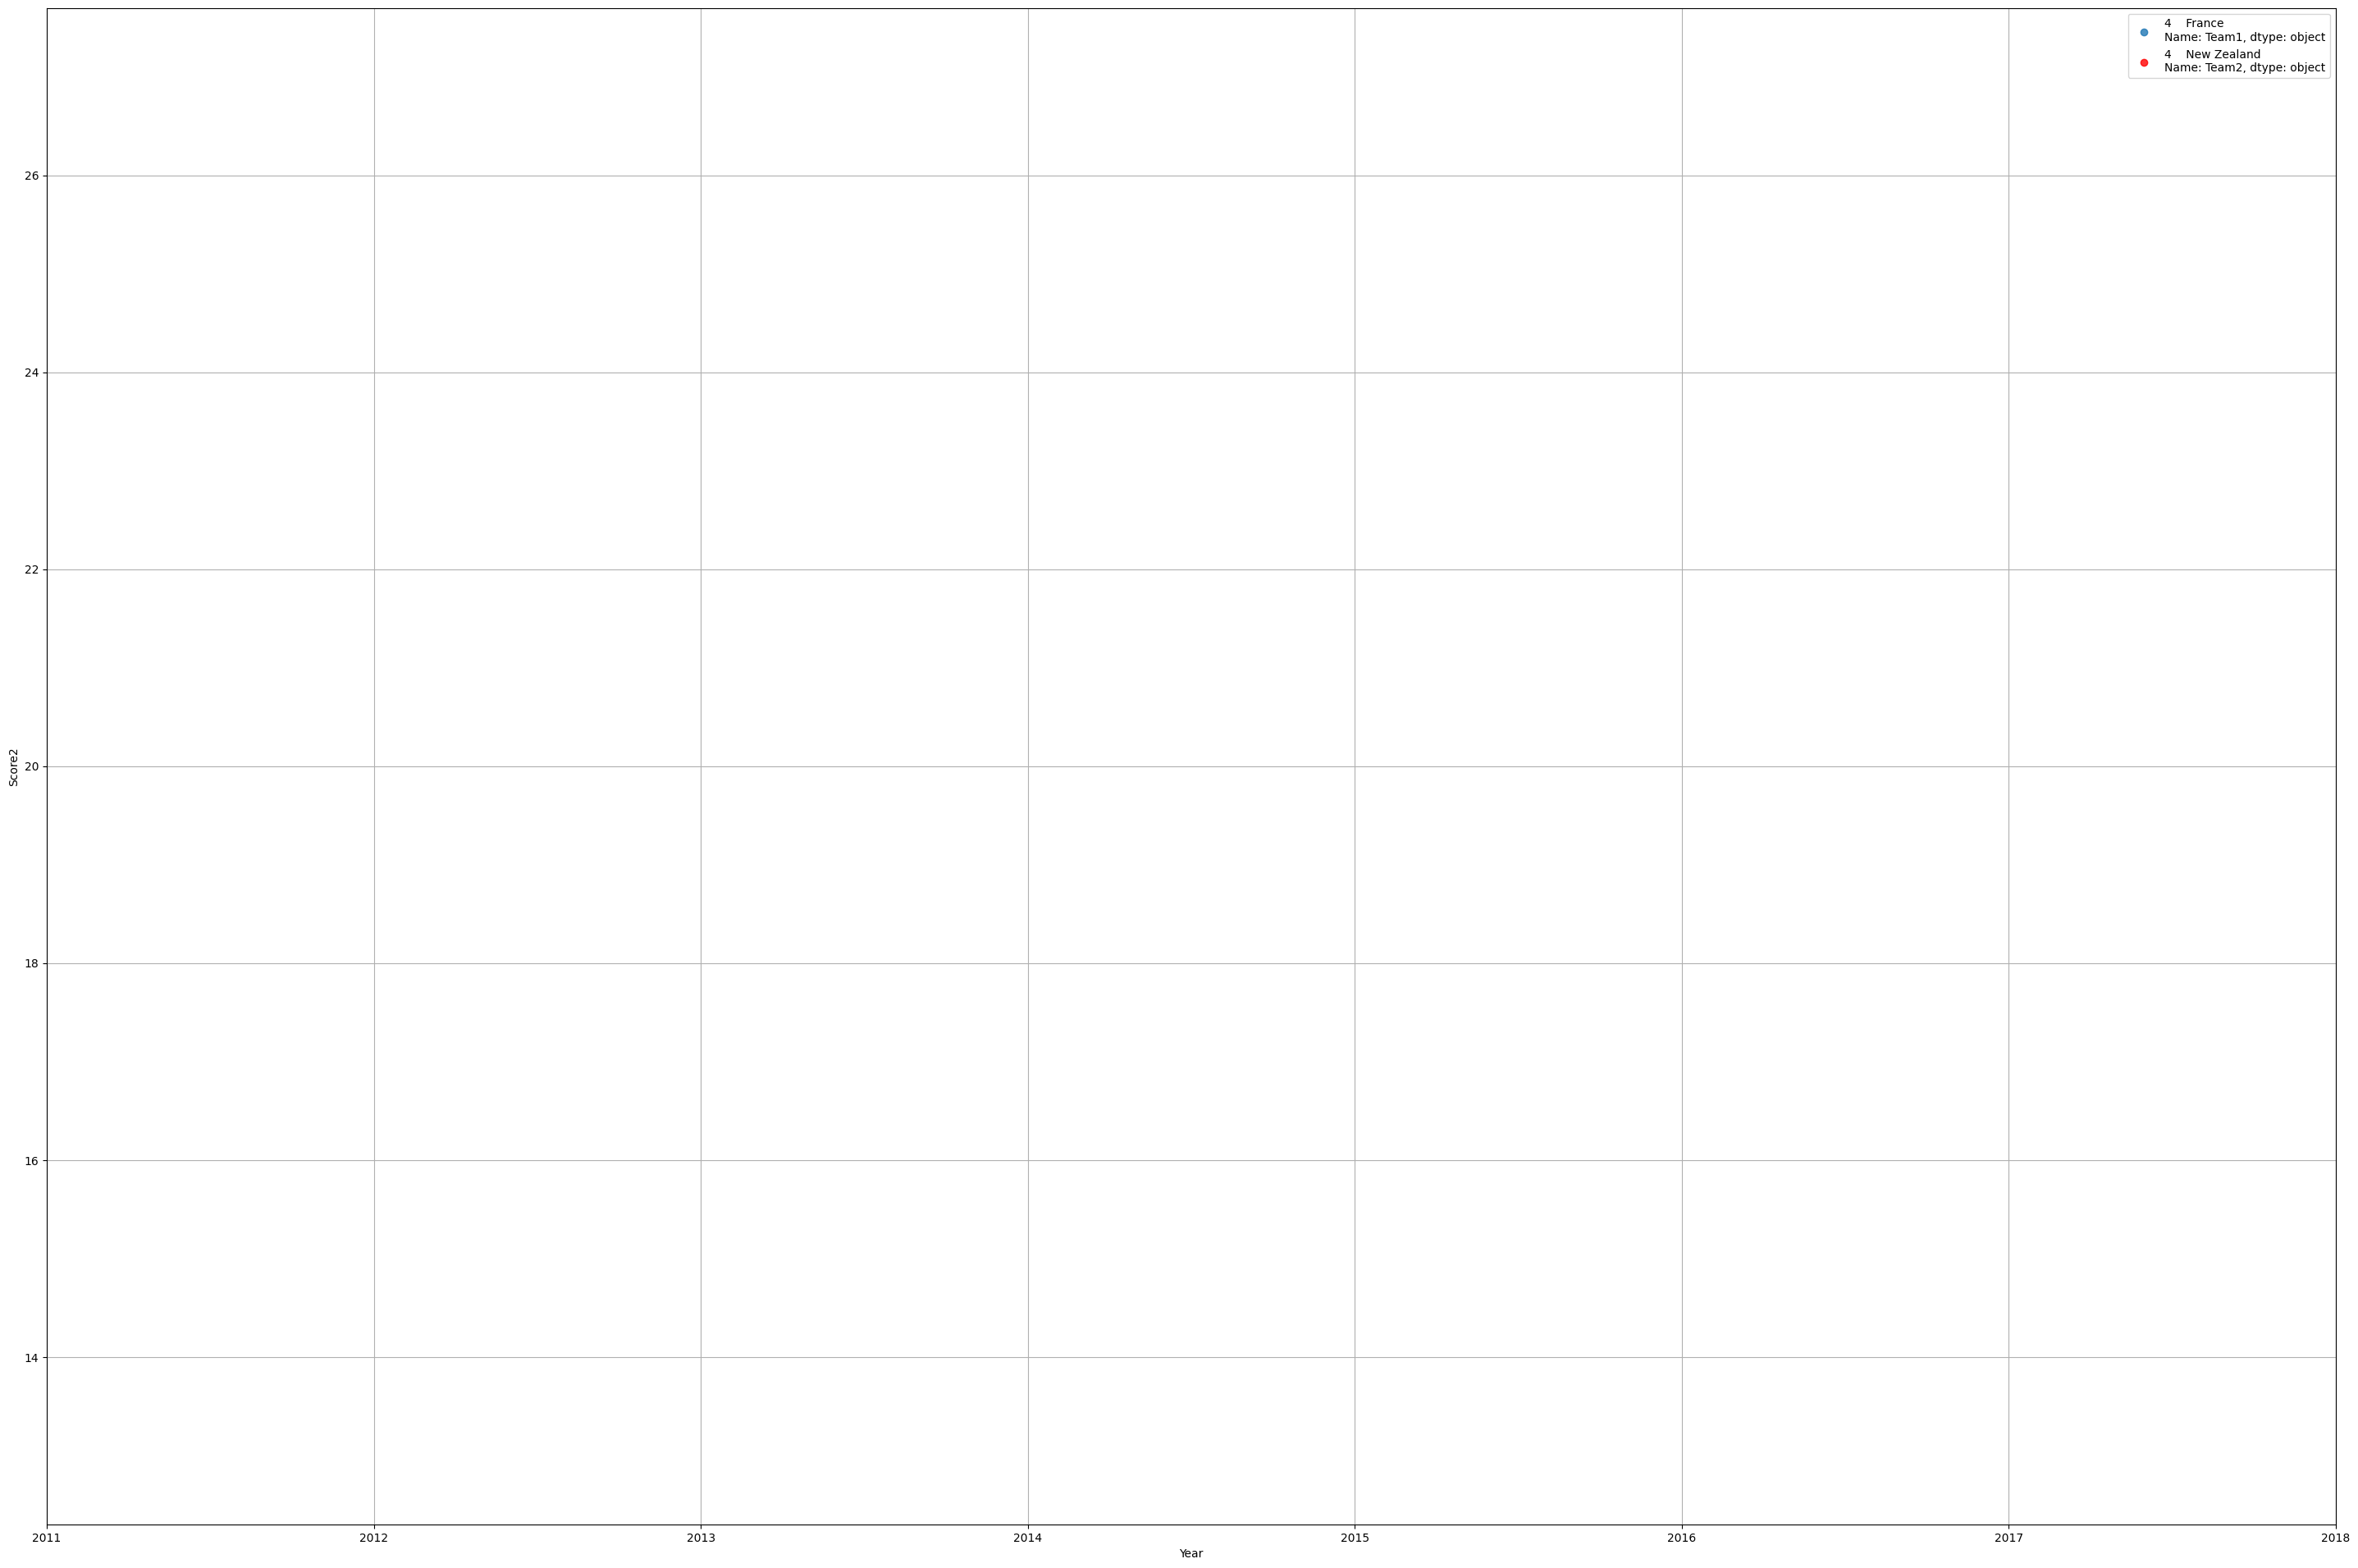

In [39]:
fig, ax = plt.subplots(figsize=(36,24))
p = sns.regplot(x='Year', y='Score1', data=mh, ax=ax, label=mh['Team1'])
p2 = sns.regplot(x='Year', y='Score2', data=mh, ax=ax, label=mh['Team2'], color='r')
plt.xlim(2011, 2018)
ax.grid()
ax.legend(loc="best")